In [1]:
import os
import json

import numpy as np
import torch
import torchvision
from torchsummary import summary

from project_18408.datasets import *
from project_18408.evaluation import *
from project_18408.experiments import *
from project_18408.utils import *

In [2]:
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only")

PyTorch Version: 1.8.0
Torchvision Version: 0.9.0
Using the GPU!


In [3]:
data_dir = get_rel_pkg_path("dataset/")
experiment_dir = get_rel_pkg_path("experiments/")

In [4]:
manager = ExperimentManager(data_dir, experiment_dir)

In [5]:
configs_fname = "experiment_configs_mnist_test2.json"

In [6]:
with open(configs_fname, 'r') as f:
    configs = json.load(f)
configs = [ExperimentConfig.from_dict(c) for c in configs]

In [7]:
def get_weight_norm_prod(model):
    prod = 1
    for layer in model.layers:
        if isinstance(layer, nn.Linear):
            v = layer.weight.norm().item()
            prod *= v
    return prod

In [8]:
results = {}

for c in configs:
    h = manager.find_experiment(c)
    if not h:
        continue
    setup, state = manager.load_experiment(c, device)
    if not state.training_complete:
        continue
    dataloaders = setup['data_setup']['dataloaders']
    model = setup['model']
    criterion = setup['training_setup']['criterion']
    train_stats = get_dataloader_stats(dataloaders['train'], model, criterion, device)
    test_stats = get_dataloader_stats(dataloaders['test'], model, criterion, device)
    
    w_norm_prod = get_weight_norm_prod(model)
    
    outputs = test_stats['outputs']
    labels = test_stats['labels']
    mask = np.tile(np.arange(outputs.shape[1]), (outputs.shape[0], 1))
    mask = mask != labels.reshape(-1, 1)
    f_x_y = outputs[np.arange(outputs.shape[0]), labels]
    max_incorrect = outputs[mask].reshape((outputs.shape[0], outputs.shape[1] - 1)).max(axis=1)
    margins = f_x_y - max_incorrect
    
    depth = len(c.model_config.config.layer_dims) + 1
    
    if test_stats['acc'] < 0.9:
        print("WARNING: LOW ACCURACY")
        print(c)

    stats = {
        "config": c,
        "train_acc": train_stats['acc'],
        "test_acc": test_stats['acc'],
        "gen_error": train_stats['acc'] - test_stats['acc'],
        "weight_norm_prod": w_norm_prod,
        "margins": margins,
        "depth": depth
    }
    
    results[h] = stats


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\44b333e88741f6ef\sessions\Session 05-19-2021 04-50-46 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\716119bb47f5a05c\sessions\Session 05-19-2021 04-52-26 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f3cfd582c9b9a972\sessions\Session 05-19-2021 04-59-59 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f88dac12158f7350\sessions\Session 05-19-2021 05-07-41 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\0b050f3f6a14b9bf\sessions\Session 05-19-2021 05-12-12 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\ca1694869d61b24a\sessions\Session 05-19-2021 05-19-59 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\6dc3543b6c1a1764\sessions\Session 05-19-2021 05-24-51 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\bc8947ac3ab84b26\sessions\Session 05-19-2021 05-30-04 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\f16119680fd73e13\sessions\Session 05-19-2021 05-38-20 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\23e792c32f5d72c2\sessions\Session 05-19-2021 05-41-30 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\2546c661d445a238\sessions\Session 05-19-2021 05-46-00 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\34598a7849cdff8c\sessions\Session 05-19-2021 05-54-44 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\3638ed3f4448b30f\sessions\Session 05-19-2021 05-58-21 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\827cdb88f8dc465c\sessions\Session 05-19-2021 06-07-11 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.01, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\162696cc649a8201\sessions\Session 05-19-2021 06-16-18 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\5cb241610e7ddaf1\sessions\Session 05-19-2021 06-22-32 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\118a90f4f3627eb8\sessions\Session 05-19-2021 06-32-04 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.01, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\e15583346bb4c876\sessions\Session 05-19-2021 06-41-29 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\57549825e10ba640\sessions\Session 05-19-2021 06-48-26 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\1ef6d3c069e14304\sessions\Session 05-19-2021 06-58-05 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.01, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\7a8c21cebbae6784\sessions\Session 05-19-2021 07-08-08 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\104efcad1f2821f2\sessions\Session 05-19-2021 07-18-10 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.0, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\aa7914b1d9cc22fb\sessions\Session 05-19-2021 07-28-33 PM


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.01, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}
Loaded session from C:\Users\Windows\Desktop\Shahir\18.408\18408-final-project\experiments\62c02e779d2a6486\sessions\Session 05-19-2021 07-38-46 PM


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.67it/s]

{'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}


In [9]:
print(stats)

{'config': {'dataset_config': {'dataset_type': 'img', 'dataset_config': {'img_dataset_type': 'mnist', 'num_train_samples': 60000, 'num_test_samples': 10000, 'new_input_size': None, 'flatten': True, 'augment': False, 'corrupt_frac': 0.0, 'seed': 0}}, 'model_config': {'model_type': 'relu_toy', 'model_config': {'input_dim': 784, 'output_dim': 10, 'layer_dims': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'bias': True, 'seed': None}}, 'training_config': {'optimizer_type': 'sgd_momentum', 'loss_type': 'cross_entropy', 'lr': 0.01, 'num_epochs': 50, 'clip_grad_norm': False, 'weight_decay': 0.1, 'use_lr_schedule': False, 'epoch_lr_decay_steps': None, 'lr_decay_gamma': None, 'early_stop': True, 'early_stop_acc': 0.9, 'early_stop_patience': 5}, 'trial_index': 0}, 'train_acc': 0.11236666666666667, 'test_acc': 0.1135, 'gen_error': -0.0011333333333333334, 'weight_norm_prod': 2.78937059640937e-20, 'margins': array([-0.02817239, -0.0785652 ,  0.02817239, ..., -0.07801323,
       -0.1

In [45]:
def invalid_run(r):
    #return False
    return r['test_acc'] < 0.5 or r['config'].training_config.weight_decay != 0

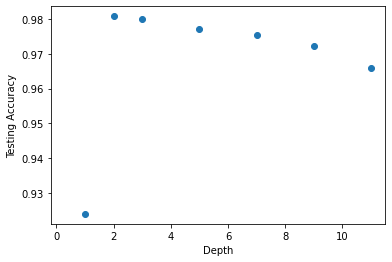

In [46]:
depths = []
test_accs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    test_accs.append(r['test_acc'])
    
plt.xlabel('Depth')
plt.ylabel('Testing Accuracy')
plt.scatter(depths, test_accs)
plt.xlim(left=-0.2)
plt.show()

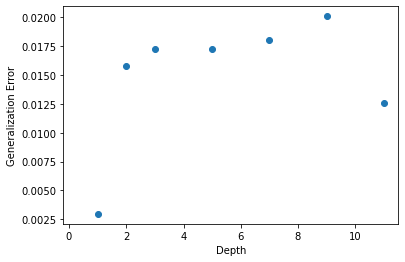

In [47]:
depths = []
gen_errs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    gen_errs.append(abs(r['gen_error']))
    
plt.xlabel('Depth')
plt.ylabel('Generalization Error')
plt.scatter(depths, gen_errs)
plt.xlim(left=-0.2)
plt.show()

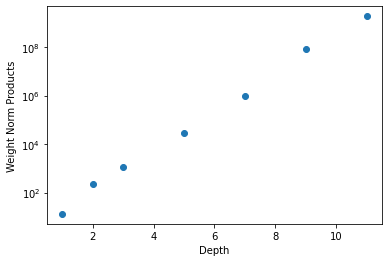

In [48]:
depths = []
w_norm_prods = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth']) #r['config'].training_config.weight_decay)
    w_norm_prods.append(r['weight_norm_prod'])
    
plt.xlabel('Depth')
plt.ylabel('Weight Norm Products')
plt.yscale('log')
plt.scatter(depths, w_norm_prods)
plt.show()

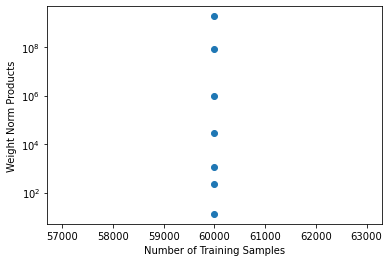

In [49]:
depths = []
w_norm_prods = []

for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['config'].dataset_config.config.num_train_samples)
    w_norm_prods.append(r['weight_norm_prod'])

plt.yscale('log')
plt.xlabel('Number of Training Samples')
plt.ylabel('Weight Norm Products')
plt.scatter(depths, w_norm_prods)
plt.show()

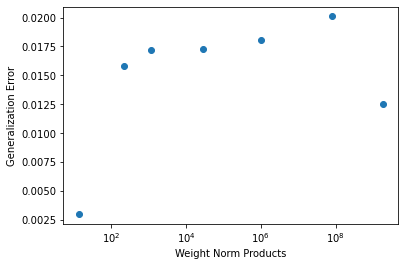

In [50]:
w_norm_prods = []
gen_errs = []

for h, r in results.items():
    if invalid_run(r):
        continue
    w_norm_prods.append(r['weight_norm_prod'])
    gen_errs.append(r['gen_error'])

plt.xscale('log')
plt.xlabel('Weight Norm Products')
plt.ylabel('Generalization Error')
plt.scatter(w_norm_prods, gen_errs)
plt.show()

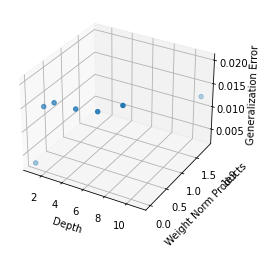

In [51]:
depths = []
gen_errs = []
w_norm_prods = []

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for h, r in results.items():
    if invalid_run(r):
        continue
    depths.append(r['depth'])
    gen_errs.append(r['gen_error'])
    w_norm_prods.append(r['weight_norm_prod'])
ax.set_xlabel('Depth')
ax.set_ylabel('Weight Norm Products')
ax.set_zlabel('Generalization Error')
#plt.xlim(left=-0.2)
ax.scatter(depths, w_norm_prods, gen_errs, marker='o')
plt.show()